In [5]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2024, day=23)

def parses(data):
    return [tuple(line.split('-')) for line in data.strip().split('\n')]

# import re
# def parses(data):
#     return [[int(i) for i in re.findall("-?\d+", line)] 
#              for line in data.strip().split('\n')]

data = parses(puzzle.input_data)

In [143]:
dir(puzzle)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_already_solved',
 '_coerce_val',
 '_get_answer',
 '_get_examples',
 '_get_prose',
 '_repr_pretty_',
 '_request_puzzle_page',
 '_save_correct_answer',
 '_save_submit_result',
 '_submit',
 '_user',
 'all',
 'answer_a',
 'answer_a_path',
 'answer_b',
 'answer_b_path',
 'answered',
 'answered_a',
 'answered_b',
 'answers',
 'day',
 'easter_eggs',
 'examples',
 'input_data',
 'input_data_path',
 'input_data_url',
 'my_stats',
 'prose0_path',
 'prose1_path',
 'prose2_path',
 'solve',
 'solve_for',
 'submit_results',
 'submit_results_path',
 'submit_url',
 'title',
 'unlock_time',
 'url',
 'user',
 'view

In [144]:
puzzle.prose0_path

PosixPath('/Users/j.gonzalez/.config/aocd/prose/2024_23_prose.0.html')

In [ ]:
solve

In [81]:
sample = parses("""kh-tc
qp-kh
de-cg
ka-co
yn-aq
qp-ub
cg-tb
vc-aq
tb-ka
wh-tc
yn-cg
kh-ub
ta-co
de-co
tc-td
tb-wq
wh-td
ta-ka
td-qp
aq-cg
wq-ub
ub-vc
de-ta
wq-aq
wq-vc
wh-yn
ka-de
kh-ta
co-tc
wh-qp
tb-vc
td-yn""")

In [138]:
import sys
sys.executable

'/Users/j.gonzalez/.pyenv/versions/anaconda3-2023.09-0/bin/python'

In [164]:
def build_graph(data):
    graph = {}
    for a, b in data:
        graph[a] = graph.get(a, set()) | set([b])
        graph[b] = graph.get(b, set()) | set([a])
    return graph

In [165]:
from toolz import valmap

In [166]:
valmap(len, build_graph(sample))

{'kh': 4,
 'tc': 4,
 'qp': 4,
 'de': 4,
 'cg': 4,
 'ka': 4,
 'co': 4,
 'yn': 4,
 'aq': 4,
 'ub': 4,
 'tb': 4,
 'vc': 4,
 'wh': 4,
 'ta': 4,
 'td': 4,
 'wq': 4}

In [167]:
# build_graph(data)

In [168]:
def triangles(graph):
    triangles = []
    for node in sorted(graph):
        for neigh in graph[node]:
            if neigh < node:
                continue
            triangles += [(node, neigh, other) for other in graph[node] & graph[neigh] if neigh < other]
    return triangles

In [169]:
G = build_graph(sample)
triangles(G)

[('aq', 'vc', 'wq'),
 ('aq', 'cg', 'yn'),
 ('co', 'ka', 'ta'),
 ('co', 'de', 'ta'),
 ('co', 'de', 'ka'),
 ('de', 'ka', 'ta'),
 ('kh', 'qp', 'ub'),
 ('qp', 'td', 'wh'),
 ('tb', 'vc', 'wq'),
 ('tc', 'td', 'wh'),
 ('td', 'wh', 'yn'),
 ('ub', 'vc', 'wq')]

In [170]:
def solve_a(data):
    tris = triangles(build_graph(data))
    return sum(1 for tri in tris if any(node.startswith('t') for node in tri))

In [171]:
solve_a(sample)

7

In [172]:
solve_a(data)

1411

In [234]:
from functools import reduce
import operator

def max_clique(graph):
    nodes = sorted(graph)

    stack = [(n,) for n in nodes]

    max_clique = []

    while stack:
        nodes = stack.pop()
        if len(nodes) > len(max_clique):
            max_clique = nodes
        candidates = reduce(operator.and_, [graph[n] for n in nodes])
        candidates = [c for c in candidates if c > nodes[-1]]
        if len(nodes) + len(candidates) <= len(max_clique):
            continue
        for candidate in candidates:
            stack.append(nodes+(candidate,))
    return max_clique

def solve_b(data):
    return ','.join(max_clique(build_graph(data)))

In [222]:
max_clique(G)

('aq', 'bn', 'ch', 'dt', 'gu', 'ow', 'pk', 'qy', 'tv', 'us', 'yx', 'zg', 'zu')

In [174]:
G = build_graph(data)

In [235]:
%%timeit
max_clique(G)

3.21 ms ± 59.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit


In [179]:
from heapq import heappush, heappop

In [243]:
def max_clique(graph):
    max_clique = []
    stack = [(tuple(), set(graph))]
    while stack:
        clique, candidates = stack.pop()
        if len(clique) > len(max_clique):
            max_clique = clique

        for c in candidates:
            if all(c in graph[n] for n in clique):
                new_clique = clique + (c,)
                new_candidates = set([d for d in candidates if d > c]) & graph[c]
                if len(new_clique) + len(new_candidates) <= len(max_clique):
                    continue
                stack.append((new_clique, new_candidates))
    return max_clique

In [244]:
%%timeit
max_clique(G)

13.7 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [223]:
# def max_clique(graph):
#     nodes = sorted(graph)
#     N = len(nodes)
#     max_clique = []
#     stack = [(tuple(), 0)]
#     while stack:
#         clique, i = stack.pop()
#         if len(clique) > len(max_clique):
#             max_clique = clique
#         if len(clique) + (N-i) <= len(max_clique):
#             continue
#         for j in range(i, N):
#             c = nodes[j]
#             if all(c in graph[n] for n in clique):
#                 stack.append((clique+(c,), j))
#     return max_clique

In [225]:
# %%time
# max_clique(G)

In [7]:
import networkx as nx

In [247]:
def build_graph(data):
    graph = {}
    G = nx.Graph()
    G.add_edges_from(data)
    return G       

In [157]:
G = build_graph(data)
sorted(max(nx.find_cliques(G), key=len))

['aq', 'bn', 'ch', 'dt', 'gu', 'ow', 'pk', 'qy', 'tv', 'us', 'yx', 'zg', 'zu']

In [34]:
def solve_a(data):
    G = build_graph(data)
    triangles = []
    for nodes in nx.enumerate_all_cliques(G):
        if len(nodes) > 3:
            break
        if len(nodes) == 3:
            triangles.append(nodes)
    return sum([1 for tri in triangles if any(n[0]=='t' for n in tri)])

In [35]:
solve_a(sample)

7

In [37]:
solve_a(data)

1411

In [39]:
G = build_graph(data)

In [40]:
nx.approximation.max_clique(G)

{'aq', 'bn', 'ch', 'dt', 'gu', 'ow', 'pk', 'qy', 'tv', 'us', 'yx', 'zg', 'zu'}

In [42]:
','.join(sorted({'aq', 'bn', 'ch', 'dt', 'gu', 'ow', 'pk', 'qy', 'tv', 'us', 'yx', 'zg', 'zu'}))

'aq,bn,ch,dt,gu,ow,pk,qy,tv,us,yx,zg,zu'

In [41]:
len(_)

13

In [60]:
G = build_graph(data[:300])

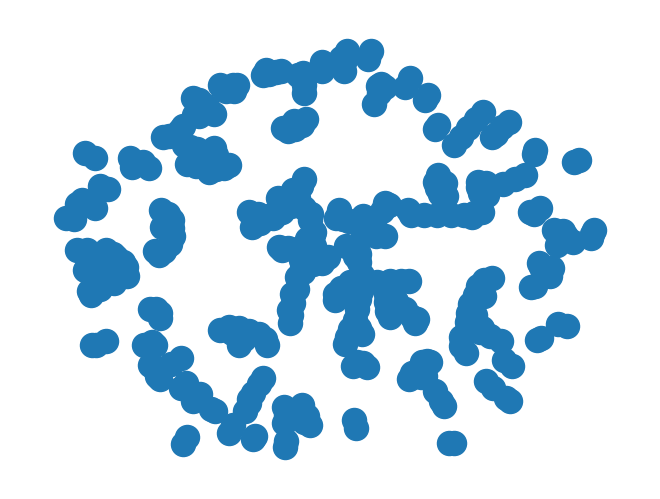

In [61]:
nx.draw(G)

In [70]:
len(data)

3380

In [249]:
G = build_graph(data)

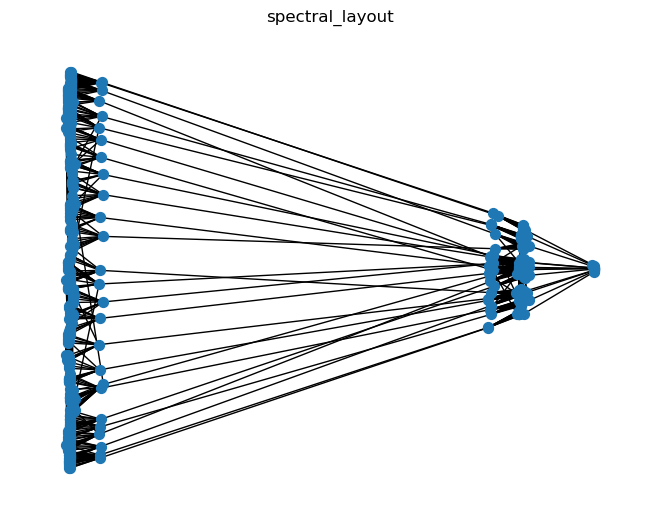

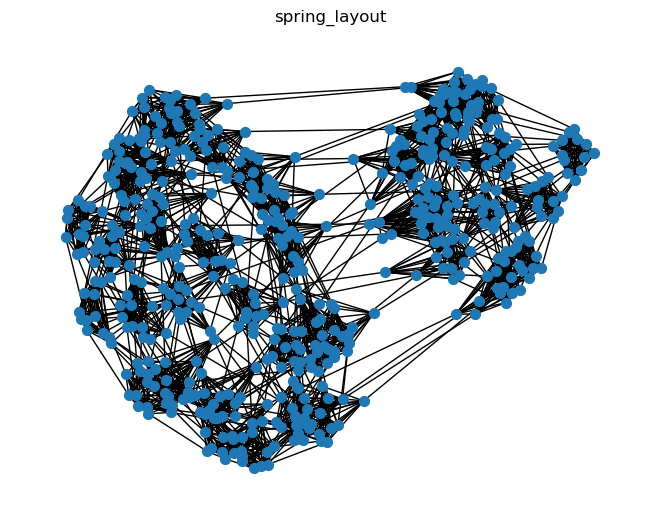

In [250]:
from functools import partial

# G = build_nx_graph(data)
for layout in [
    nx.spectral_layout,
    nx.spring_layout,
]:
    pos = layout(G)
    nx.draw(G, pos=pos, node_size=50)
    plt.title(layout.__name__)
    plt.show()

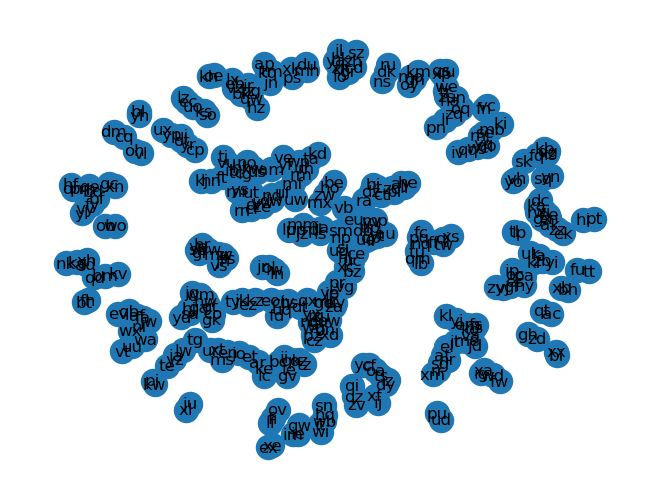

In [64]:
nx.draw(G,with_labels=True)

In [43]:
len(G)

520

In [27]:
sum(nx.triangles(G).values())//3

12

In [28]:
sorted(nx.triangles(G).items())

[('aq', 2),
 ('cg', 1),
 ('co', 3),
 ('de', 3),
 ('ka', 3),
 ('kh', 1),
 ('qp', 2),
 ('ta', 3),
 ('tb', 1),
 ('tc', 1),
 ('td', 3),
 ('ub', 2),
 ('vc', 3),
 ('wh', 3),
 ('wq', 3),
 ('yn', 2)]

7

In [19]:
sum([v for k, v in nx.triangles(G).items() if k[0] == 't'])

8

In [ ]:
def solve_a(data):
    pass

In [ ]:
solve_a(sample)

In [ ]:
solve_a(data)

In [ ]:
def solve_b(data):
    pass

In [ ]:
solve_b(sample)

In [ ]:
solve_b(data)